In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
#inputs 
X = data.iloc[0:100, [0,1,2,3]].values
#print(X)
#outputs
y = data.iloc[0:100, 4].values
#print(y)
y = np.where(y == 'Iris-setosa', -1, 1)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


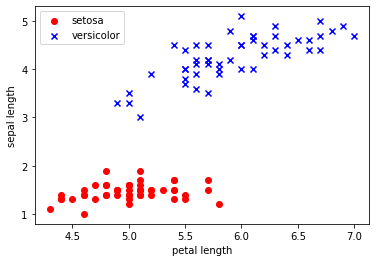

In [46]:
plt.scatter(X[:50, 0], X[:50, 2], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 2], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [49]:
class Perceptron():
   def __init__(self, rate = 0.01, n_iter = 10):
      self.rate = rate
      self.n_iter = n_iter
   def fit(self, X, y):
      # weights
      self.weight = np.zeros(1 + X.shape[1])
      print(self.weight)             
      # Number of misclassifications
      self.errors = []  
      for i in range(self.n_iter):
         err = 0
         for xi, target in zip(X, y):
            delta_w = self.rate *(target - self.predict(xi))
            self.weight[1:] += (delta_w*xi) 
            self.weight[0] += delta_w 
            err += int(delta_w != 0.0)
         self.errors.append(err)
      print("Final weights:",self.weight)
      print(self.errors)
   def net_output(self, X):
      return np.dot(X, self.weight[1:]) + self.weight[0]
   def predict(self, X):
      return np.where(self.net_output(X) >= 0.0, 1, -1)
   
p = Perceptron()
p.fit(X, y)

[0. 0. 0. 0. 0.]
Final weights: [-0.02  -0.026 -0.082  0.104  0.044]
[2, 2, 1, 0, 0, 0, 0, 0, 0, 0]


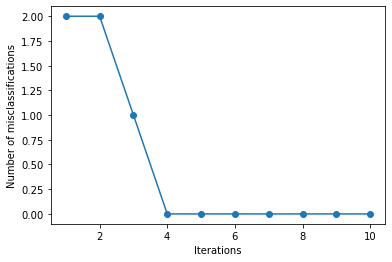

In [50]:
plt.plot(range(1, len(p.errors) + 1), p.errors, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Number of misclassifications')
plt.show()